In [100]:
# DI: uses conda activate NASEM_model_poetry_SALib
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.analyze.sobol import analyze
from SALib.sample.sobol import sample
import numpy as np
import nasem_dairy as nd  

This is an example wrapper function that could be used with SAlib 'param_values' that are a matrix of new coeff_dict values.

after more context from SAlib docs, this is a new template: 

In [123]:
def wrapped_execute_model(
        X, 
        coeffs_sampled, 
        user_diet_in, 
        animal_input_in, 
        equation_selection_in, 
        feed_library_in, 
        default_coeff_dict=nd.coeff_dict, 
        func=nd.nasem):
    """
    Executes the specified model function with varying sets of coefficients and fixed model inputs, 
    returning an array of model outputs for sensitivity analysis.

    Parameters
    ----------
    X : ndarray
        A 2D numpy array where each row represents a set of sampled coefficient values to be evaluated.
    coeffs_sampled : list of str
        List of coefficient names corresponding to the columns in `X`. These are the coefficients being varied in the analysis.
    user_diet_in : dict
        Dictionary containing user-defined diet inputs for the model.
    animal_input_in : dict
        Dictionary containing animal-related inputs for the model.
    equation_selection_in : dict
        Dictionary specifying which equations to use within the model.
    feed_library_in : DataFrame 
        Data structure containing feed library information required by the model.
    default_coeff_dict : dict, optional
        The default dictionary of all coefficients used by the model, with keys as coefficient names and values as their default values. Default is `nd.coeff_dict`.
    func : function, optional
        The model function to be executed. This function should accept the model inputs as arguments and return a `ModelOutput` object. Default is `nd.execute_model`.

    Returns
    -------
    outputs : ndarray
        A 1D numpy array containing the model output of interest for each set of coefficients in `X`.

    Notes
    -----
    This function is designed to work with sensitivity analysis libraries like SALib. It takes samples of coefficient values generated by such a library, applies them to the model, and collects the outputs for analysis.

    The model function (`func`) is expected to return an object with a `get_value` method, which is used to extract the specific output of interest for sensitivity analysis.

    Examples
    --------
    >>> import numpy as np
    >>> from SALib.sample import saltelli
    >>> from nasem_dairy import execute_model, coeff_dict
    >>> 
    >>> problem = {
    ...     'num_vars': 3,
    ...     'names': ['coeff1', 'coeff2', 'coeff3'],
    ...     'bounds': [[0, 1], [0, 1], [0, 1]]
    ... }
    >>> param_values = saltelli.sample(problem, 100)
    >>> coeffs_sampled = problem['names']
    >>> 
    >>> outputs = wrapped_execute_model(param_values, coeffs_sampled, user_diet, animal_input, equation_selection, feed_library)
    """
    
    # Initialize an empty array to hold the outputs of interest for sensitivity analysis
    outputs = np.zeros(X.shape[0])

    # Iterate over each set of parameters in X
    for i, param_set in enumerate(X):
        # print(i)
        # Start with a copy of the default_coeff_dict
        updated_coeff_dict = default_coeff_dict.copy()
        
        # Update only the coefficients that are being modified in this analysis
        for name, value in zip(coeffs_sampled, param_set):
            # print(name + str(value))
            updated_coeff_dict[name] = value

        # Execute the model with the updated set of coefficients
        model_output = func(
            user_diet=user_diet_in,
            animal_input=animal_input_in,
            equation_selection=equation_selection_in,
            feed_library =feed_library_in,
            coeff_dict =updated_coeff_dict
        )

        # Extract the output of interest from the ModelOutput object
        # Here, 'output_name' should be replaced with the actual name of the output you're interested in
        # output_value = model_output.get_value('Mlk_Prod_comp')
        # output_value = model_output.get_value('An_MEavail_Milk')
        # output_value = model_output.get_value('Mlk_Prod_NEalow')
        output_value =  model_output.get_value('Trg_Mlk_MEout')
        # output_value2 = model_output.get_value('Mlk_Fatemp_g')
        
        # Store the extracted output in the outputs array
        outputs[i] = output_value
        print(f"Output for sample {i}: {output_value}")  # Debug print

    return outputs


In [124]:
# import os 
# print (os.getcwd())

In [125]:
import importlib_resources
import pandas as pd
import os 
path_to_package_data = importlib_resources.files("nasem_dairy.data")
path = os.path.join(os.getcwd(), "../data")

# Read_csv to load required data into env
#user_diet_in, animal_input_in, equation_selection_in = nd.read_csv_input(path_to_package_data.joinpath("./input.csv"))

#Reading in PK inputs
user_diet_in, animal_input_in, equation_selection_in, _ = nd.read_csv_input(f"{path}/input.pk.csv")

# Load feed library
#feed_library_in = pd.read_csv(path_to_package_data.joinpath("NASEM_feed_library.csv"))


#Loading PK feed library
feed_library_in = pd.read_csv(f"{path}/NASEM_feed_library.pk.csv") 


# Prepare infusion data (This will be optional as a default dict of 0 is provided to function otherwise)
# infusion_custom = nd.read_infusion_input(path_to_package_data.joinpath("infusion_input.csv"))


In [126]:
nd.coeff_dict

{'An_Fe_m': 0,
 'An_GutFill_BWmature': 0.18,
 'An_NEmUse_Env': 0,
 'AshGain_RsrvGain': 0.02,
 'Body_Arg_TP': 8.2,
 'Body_His_TP': 3.04,
 'Body_Ile_TP': 3.69,
 'Body_Leu_TP': 8.27,
 'Body_Lys_TP': 7.9,
 'Body_Met_TP': 2.37,
 'Body_NP_CP': 0.86,
 'Body_Phe_TP': 4.41,
 'Body_Thr_TP': 4.84,
 'Body_Trp_TP': 1.05,
 'Body_Val_TP': 5.15,
 'CH4vol_kg': 1497,
 'CPGain_RsrvGain': 0.068,
 'CP_GrUtWt': 0.123,
 'dcNPNCP': 100,
 'Dt_dcCP_ClfLiq': 0.95,
 'En_Acet': 3.48,
 'En_Butr': 5.95,
 'En_CH4': 13.264818355640536,
 'En_CP': 5.65,
 'En_FA': 9.4,
 'En_NDF': 4.2,
 'En_NDFnf': 4.14,
 'En_NFC': 4.2,
 'En_NPNCP': 0.89,
 'En_Prop': 4.96,
 'En_St': 4.23,
 'En_WSC': 3.9,
 'En_rOM': 4.0,
 'EndArgProf': 4.61,
 'EndHisProf': 2.9,
 'EndIleProf': 4.09,
 'EndLeuProf': 7.67,
 'EndLysProf': 6.23,
 'EndMetProf': 1.26,
 'EndPheProf': 3.98,
 'EndThrProf': 5.18,
 'EndTrpProf': 1.29,
 'EndValProf': 5.29,
 'FatGain_RsrvGain': 0.622,
 'Fe_ArgMetab_TP': 5.9,
 'Fe_HisMetab_TP': 3.54,
 'Fe_IleMetab_TP': 5.39,
 'Fe_LeuMetab

In [127]:
print (nd.coeff_dict['Maintenance'])

0.1


In [128]:
coeff_copy = nd.coeff_dict.copy()


coeff_copy['Maintenance'] = 0.1

# [key for key in coeff_copy.keys() if "Km" in key]
# coeff_copy['Km_ME_NE_Cow']

In [129]:
equation_selection_in['mProd_eqn'] = 1
equation_selection_in

{'Use_DNDF_IV': 0.0,
 'DMIn_eqn': 0.0,
 'mProd_eqn': 1,
 'MiN_eqn': 1.0,
 'NonMilkCP_ClfLiq': 0.0,
 'Monensin_eqn': 0.0,
 'mPrt_eqn': 0.0,
 'mFat_eqn': 1.0,
 'RumDevDisc_Clf': 0.0}

In [130]:
single_output = nd.nasem(
    user_diet = user_diet_in, 
    animal_input = animal_input_in, 
    equation_selection = equation_selection_in, 
    feed_library = feed_library_in, 
    coeff_dict = nd.coeff_dict
    )

single_output.search("Mlk_prod")

,Name,Value,Category,Level 1,Level 2
0,Mlk_Prod,34.197213,Production,milk,Mlk_Prod
1,Mlk_Prod_MPalow,35.906472,Production,milk,Mlk_Prod_MPalow
2,Mlk_Prod_NEalow,31.261172,Production,milk,Mlk_Prod_NEalow
3,Mlk_Prod_NEalow_EPcor,37.423531,Production,milk,Mlk_Prod_NEalow_EPcor
4,Mlk_Prod_comp,34.197213,Production,milk,Mlk_Prod_comp


In [131]:

single_output = nd.nasem(
    user_diet = user_diet_in, 
    animal_input = animal_input_in, 
    equation_selection = equation_selection_in, 
    feed_library = feed_library_in, 
    coeff_dict = coeff_copy
    )

single_output.search("Mlk_Prod")

,Name,Value,Category,Level 1,Level 2
0,Mlk_Prod,34.197213,Production,milk,Mlk_Prod
1,Mlk_Prod_MPalow,35.906472,Production,milk,Mlk_Prod_MPalow
2,Mlk_Prod_NEalow,31.261172,Production,milk,Mlk_Prod_NEalow
3,Mlk_Prod_NEalow_EPcor,37.423531,Production,milk,Mlk_Prod_NEalow_EPcor
4,Mlk_Prod_comp,34.197213,Production,milk,Mlk_Prod_comp


In [132]:
#single_output.get_value('Mlk_Prod')


single_output.get_value('An_MEavail_Milk')

39.23656012385192

## 1. Define problem

In [133]:
from SALib.sample.sobol import sample

# Assuming coeffs_sampled is defined as follows:
# coeffs_sampled = ['An_NEmUse_Env', 'Km_ME_NE', 'FatGain_RsrvGain', 'Kf_ME_RE', 
#                   'NE_GrUtWt', 'Kl_ME_NE', 'Km_MP_NP_Trg', 'Kg_MP_NP_Trg', 
# #                   'Ky_MP_NP_Trg', 'Ky_NP_MP_Trg', 'Kl_MP_NP_Trg']
# coeffs_sampled = [ 'Km_ME_NE', 'Kf_ME_RE', 
#                    'Kl_ME_NE' ]

coeffs_sampled = ['Maintenance', 'Kl_ME_NE']

# Define  problem statement 
problem = {
    'num_vars': len(coeffs_sampled),
    'names': coeffs_sampled,
    'bounds': [[0, 1]] * len(coeffs_sampled)
}

problem


{'num_vars': 2,
 'names': ['Maintenance', 'Kl_ME_NE'],
 'bounds': [[0, 1], [0, 1]]}

## 2. Generate Samples
notes:
In the context of sensitivity analysis, a "sample" refers to a specific set of input parameters (in your case, coefficients) that will be used to run your model. Each sample represents a unique combination of values for all the input parameters you're analyzing.

The choice of num_samples depends on the model's complexity, computational resources, and the chosen sampling method. 
SALib's Saltelli sampling method generates N * (2D+2) samples, where N is the base sample size, and D is the number of parameters. 
This approach efficiently captures the effects of parameter variations and their interactions on the model output. 
Starting with a few hundred to a few thousand samples is common, balancing between analysis thoroughness and computational feasibility.
To address the convergence properties warning, choose a num_samples value that is a power of 2. Common choices include 256, 512, 1024, etc. This ensures that the number of evaluations is in the form of 2^n, aligning with the recommendations for using Sobol' sequences:

python
Copy code
num_samples = 1024  # Example: Choose a value that is a power of 2
param_values = sobol.sample(problem, num_samples)

In [134]:
# Choose a number of samples that is a power of 2 for optimal Sobol' sequence properties
num_samples = 256

# Generate samples using the Sobol' sequence
param_values = sample(problem, num_samples)


In [135]:
param_values

array([[0.89559409, 0.59882586],
       [0.05302802, 0.59882586],
       [0.89559409, 0.68773963],
       ...,
       [0.892376  , 0.09758454],
       [0.53573641, 0.13771551],
       [0.53573641, 0.09758454]])

In [136]:
param_values.size

3072

## 3. Evaluate model
Using wrapper that takes np array and return np array (2D)

In [137]:

outputs = wrapped_execute_model(
    param_values,
      coeffs_sampled,
      user_diet_in, 
      animal_input_in, 
      equation_selection_in, 
      feed_library_in, 
      default_coeff_dict=nd.coeff_dict, 
      func=nd.nasem)

The following keys differ from their default values: 
Kl_ME_NE: User: 0.5988258626312017, Default: 0.66
Maintenance: User: 0.895594091154635, Default: 0.1
Output for sample 0: 34.669276755646685
The following keys differ from their default values: 
Kl_ME_NE: User: 0.5988258626312017, Default: 0.66
Maintenance: User: 0.053028021939098835, Default: 0.1
Output for sample 1: 34.669276755646685
The following keys differ from their default values: 
Kl_ME_NE: User: 0.6877396339550614, Default: 0.66
Maintenance: User: 0.895594091154635, Default: 0.1
Output for sample 2: 30.187091938570113
The following keys differ from their default values: 
Kl_ME_NE: User: 0.6877396339550614, Default: 0.66
Maintenance: User: 0.895594091154635, Default: 0.1
Output for sample 3: 30.187091938570113
The following keys differ from their default values: 
Kl_ME_NE: User: 0.5988258626312017, Default: 0.66
Maintenance: User: 0.053028021939098835, Default: 0.1
Output for sample 4: 34.669276755646685
The following keys 

In [138]:
outputs

array([ 34.66927676,  34.66927676,  30.18709194, ..., 212.74741637,
       150.75178929, 212.74741637])

In [18]:
# import cProfile
# import pstats

# # Profile this function call
# cProfile.runctx("wrapped_execute_model(param_values, coeffs_sampled, user_diet_in, animal_input_in, equation_selection_in, feed_library_in, default_coeff_dict=nd.coeff_dict)", globals(), locals(), "profile_output.prof")
# p = pstats.Stats("profile_output.prof")
# p.sort_stats("cumulative").print_stats(10)

## 4. Sensitivity Analysis

In [139]:
problem

{'num_vars': 2,
 'names': ['Maintenance', 'Kl_ME_NE'],
 'bounds': [[0, 1], [0, 1]],
 'sample_scaled': True}

In [140]:

from SALib.analyze.sobol import analyze

# Assuming 'outputs' is a numpy array containing the model output for each sample
Si = analyze(problem, outputs, print_to_console=True)



                   ST   ST_conf
Maintenance  0.000000  0.000000
Kl_ME_NE     1.005541  0.028441
                   S1   S1_conf
Maintenance  0.000000  0.000000
Kl_ME_NE     1.888558  1.502688
                          S2       S2_conf
[Maintenance, Kl_ME_NE]  0.0  1.218197e-16


/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


In [141]:
# Print the first-order Sobol indices
print("First-order Sobol indices:", Si['S1'])


First-order Sobol indices: [0.         1.88855812]


In [142]:
print("Total Sobol indices:", Si['ST'])


Total Sobol indices: [0.         1.00554065]


In [144]:
print (Si['S2'].shape)

(2, 2)


In [145]:
print("x1-x2:", Si['S2'][0,1])
# print("x1-x3:", Si['S2'][0,2])
# print("x2-x3:", Si['S2'][1,2])

x1-x2: 0.0


/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

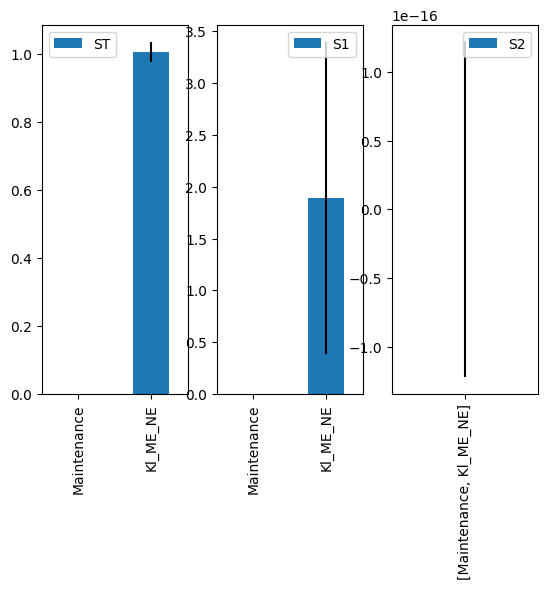

In [146]:
Si.plot()

# ProblemSpec method 
Higher level API (object orientated)
Has built-in parallel processing
For the .evaluate() method to use nproc it needs multiple outputs too, added in this example

In [147]:
import numpy as np

def wrapped_execute_model_multiple_out(X, coeffs_sampled, user_diet_in, animal_input_in, equation_selection_in, feed_library_in, default_coeff_dict=nd.coeff_dict, func=nd.nasem):
    """
    Modified function to execute the model and return two outputs for sensitivity analysis.

    Parameters are the same as in the provided documentation.
    """
    
    # Initialize a 2D numpy array to hold the two outputs of interest for each set of coefficients
    outputs = np.zeros((X.shape[0], 2))

    # Iterate over each set of parameters in X
    for i, param_set in enumerate(X):
        # Copy the default_coeff_dict to update with current set of parameters
        updated_coeff_dict = default_coeff_dict.copy()
        
        # Update the coefficients being modified in this analysis
        for name, value in zip(coeffs_sampled, param_set):
            updated_coeff_dict[name] = value

        # Execute the model with the updated coefficients
        model_output = func(
            user_diet=user_diet_in,
            animal_input=animal_input_in,
            equation_selection=equation_selection_in,
            feed_library=feed_library_in,
            coeff_dict=updated_coeff_dict
        )

        # Extract the two outputs of interest from the ModelOutput object
        output_value1 = model_output.get_value('An_MEavail_Milk')
        output_value2 = model_output.get_value('Mlk_MEout')
        
        # Store both outputs in the outputs array for the current set of parameters
        outputs[i, 0] = output_value1  # For the first output
        outputs[i, 1] = output_value2  # For the second output

    return outputs


In [148]:
import numpy as np
from SALib import ProblemSpec
import nasem_dairy as nd  # Make sure to import your module
from functools import partial

# The coefficients you want to vary in your sensitivity analysis
coeffs_sampled = ['Km_ME_NE', 'Kf_ME_RE', 'Kl_ME_NE']

# Assuming 'user_diet_in', 'animal_input_in', 'equation_selection_in', 'feed_library_in' are defined

# Define the problem specification using your coefficients
# Define the problem statement for SALib
sp = ProblemSpec({
    'names': coeffs_sampled,
    'bounds': [[0, 1]] * len(coeffs_sampled),
    'outputs': ['An_MEavail_Milk', 'Mlk_MEout'],  # Adjust these to your actual output names
})

# Assuming 'user_diet_in', 'animal_input_in', 'equation_selection_in', 'feed_library_in' are defined
# You need to ensure these are defined appropriately before this part of the code

# Define a partial function that includes all the fixed parameters and the default_coeff_dict
evaluate_model_with_fixed_params = partial(
    wrapped_execute_model_multiple_out,
    coeffs_sampled=coeffs_sampled,
    user_diet_in=user_diet_in,
    animal_input_in=animal_input_in,
    equation_selection_in=equation_selection_in,
    feed_library_in=feed_library_in,
    default_coeff_dict=nd.coeff_dict,
    func=nd.nasem  # Assuming execute_model is a function that returns a ModelOutput object
)



In [149]:

# Run the sampling, model evaluation, and Sobol sensitivity analysis using parallel processing
results = (
    sp.sample_sobol(2**8)  # This will generate Sobol samples
    .evaluate(evaluate_model_with_fixed_params, nprocs=6)  # Evaluate using 2 processes
    .analyze_sobol(nprocs=6)  # Analyze using 2 processes
)

# 'results' will contain the Sobol indices and other related information from the analysis

/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/problem.py:213: UserWarning: Parallel evaluation is an experimental feature and may not work.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/problem.py:225: UserWarning: 6 processors requested but only 4 found.
  warnings.warn(


The following keys differ from their default values: The following keys differ from their default values: The following keys differ from their default values: 


Kl_ME_NE: User: 0.7841962967067957, Default: 0.66Kl_ME_NE: User: 0.20423406828194857, Default: 0.66Kl_ME_NE: User: 0.5888985386118293, Default: 0.66The following keys differ from their default values: 



Kl_ME_NE: User: 0.41521765291690826, Default: 0.66
The following keys differ from their default values: The following keys differ from their default values: The following keys differ from their default values: 


Kl_ME_NE: User: 0.20423406828194857, Default: 0.66Kl_ME_NE: User: 0.5888985386118293, Default: 0.66Kl_ME_NE: User: 0.7841962967067957, Default: 0.66The following keys differ from their default values: 



Kl_ME_NE: User: 0.41521765291690826, Default: 0.66
The following keys differ from their default values: The following keys differ from their default values: 

Kl_ME_NE: User: 0.20423406828194857, Default: 0.66Kl_ME_

/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/problem.py:401: UserWarning: Parallel analysis is an experimental feature and may not work.
  warnings.warn("Parallel analysis is an experimental feature and may not work.")
/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/analyze/sobol.py:216: UserWarning: Constant values encounte

In [71]:
results

/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/usr/local/Caskroom/miniconda/base/envs/nasem_poetry/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	3 parameters: ['Km_ME_NE', 'Kf_ME_RE', 'Kl_ME_NE']
	2048 samples
Outputs:
	2 outputs: ['An_MEavail_Milk', 'Mlk_MEout']
	2048 evaluations
Analysis:
An_MEavail_Milk:
          ST  ST_conf
Km_ME_NE NaN      NaN
Kf_ME_RE NaN      NaN
Kl_ME_NE NaN      NaN:
          S1  S1_conf
Km_ME_NE NaN      NaN
Kf_ME_RE NaN      NaN
Kl_ME_NE NaN      NaN:
                      S2  S2_conf
(Km_ME_NE, Kf_ME_RE) NaN      NaN
(Km_ME_NE, Kl_ME_NE) NaN      NaN
(Kf_ME_RE, Kl_ME_NE) NaN      NaN:
Mlk_MEout:
                ST   ST_conf
Km_ME_NE  0.000000  0.000000
Kf_ME_RE  0.000000  0.000000
Kl_ME_NE  0.985318  0.150929:
                S1   S1_conf
Km_ME_NE  0.000000  0.000000
Kf_ME_RE  0.000000  0.000000
Kl_ME_NE  0.435106  0.978847:
                       S2       S2_conf
(Km_ME_NE, Kf_ME_RE)  0.0  0.000000e+00
(Km_ME_NE, Kl_ME_NE)  0.0  4.881184e-17
(Kf_ME_RE, Kl_ME_NE)  0.0  4.881184e-17:


/usr/local/Caskroom/miniconda/base/envs/nasem/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/usr/local/Caskroom/miniconda/base/envs/nasem/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([[<Axes: title={'center': 'An_MEavail_Milk'}>, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'Mlk_MEout'}>, <Axes: >, <Axes: >]],
      dtype=object)

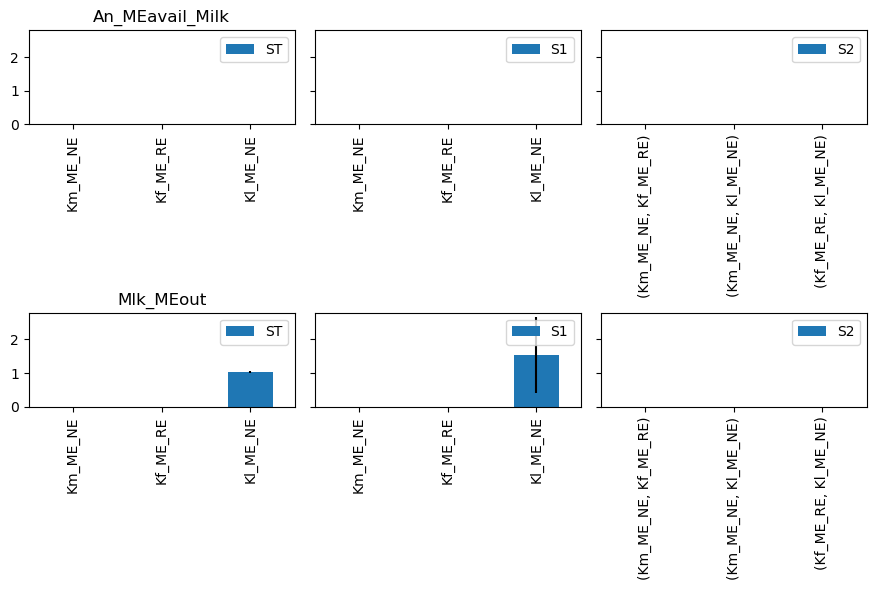

In [60]:
results.plot()

/usr/local/Caskroom/miniconda/base/envs/nasem/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'An_MEavail_Milk'}>

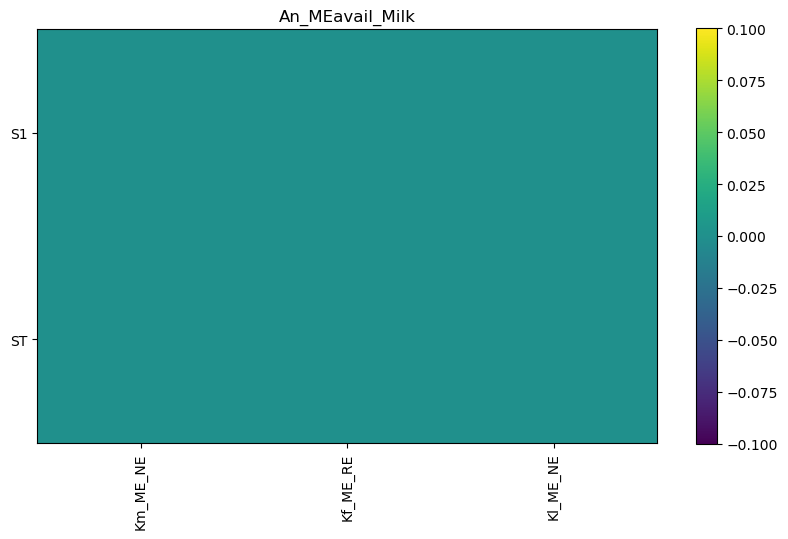

In [61]:
results.heatmap()

array([<Axes: title={'center': 'An_MEavail_Milk'}>,
       <Axes: title={'center': 'Mlk_MEout'}>], dtype=object)

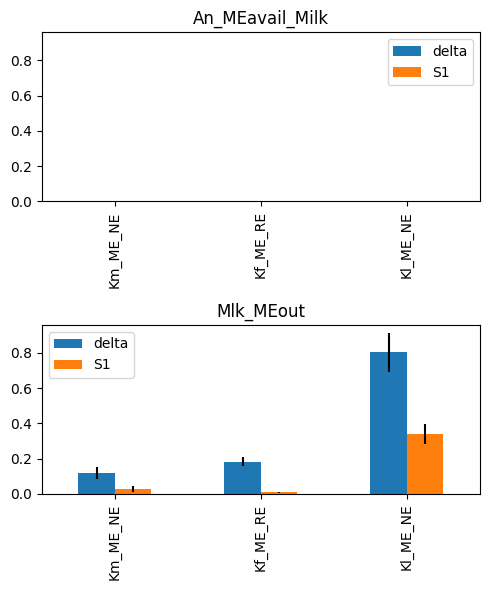

In [150]:
    results.analyze_delta(num_resamples=5)
    results.plot()
    

In [64]:
results.to_df()

[]